# Setup

In [1]:
import autograd.numpy as ag_np
import numpy as np
import pandas as pd
import os
# Import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

import sys
sys.path.append("/")
from train_valid_test_loader import load_train_valid_test_datasets

In [2]:
data_path = 'data_movie_lens_100k/' # Path to where dataset csv files live on your system

In [3]:
train_tuple, test_tuple, valid_tuple, n_users, n_items = load_train_valid_test_datasets(data_path=data_path)

In [4]:
n_train_examples = len(train_tuple[0])
N = n_train_examples

# Unpack the tuple into its three contained arrays
userids_tr_N = train_tuple[0]
itemids_tr_N = train_tuple[1]
ratings_tr_N = train_tuple[2]

userids_va_N = valid_tuple[0]
itemids_va_N = valid_tuple[1]
ratings_va_N = valid_tuple[2]

userids_te_N = test_tuple[0]
itemids_te_N = test_tuple[1]
ratings_te_N = test_tuple[2]

In [5]:
print(userids_tr_N[:5])
print(itemids_tr_N[:5])
print(ratings_tr_N[:5])

[662 298  90 912 302]
[761  90 349 917  42]
[5 4 4 4 3]


In [6]:
print(len(userids_tr_N))
print(len(itemids_tr_N))
print(len(userids_va_N))
print(len(itemids_va_N))
print(len(userids_te_N))
print(len(itemids_te_N))

70000
70000
10000
10000
9992
9992


# Problem 1

In [57]:
import CollabFilterMeanOnly
import importlib
importlib.reload(CollabFilterMeanOnly)
from CollabFilterMeanOnly import CollabFilterMeanOnly

In [58]:
# Create the model
model = CollabFilterMeanOnly(
    n_epochs=6, batch_size=10000, step_size=0.1)

In [59]:
hasattr(model, 'param_dict')

False

In [60]:
model.init_parameter_dict(n_users, n_items, train_tuple)

In [61]:
hasattr(model, 'param_dict')

True

In [62]:
model.param_dict

{'mu': array([0.])}

In [63]:
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.63800 | train_MAE     3.53059 | valid_MAE     3.50620 | grad_wrt_mu     7.03040
epoch       0.143 | loss_total     9.33072 | train_MAE     2.82755 | valid_MAE     2.80316 | grad_wrt_mu     5.68192
epoch       0.286 | loss_total     6.40404 | train_MAE     2.29264 | valid_MAE     2.26855 | grad_wrt_mu     4.53114
epoch       0.429 | loss_total     4.49626 | train_MAE     1.89513 | valid_MAE     1.87153 | grad_wrt_mu     3.57311
epoch       0.571 | loss_total     3.34473 | train_MAE     1.60017 | valid_MAE     1.57763 | grad_wrt_mu     2.88409
epoch       0.714 | loss_total     2.60167 | train_MAE     1.41250 | valid_MAE     1.39264 | grad_wrt_mu     2.33007
epoch       0.857 | loss_total     2.13770 | train_MAE     1.26089 | valid_MAE     1.24319 | grad_wrt_mu     1.89066
epoch       1.000 | loss_total     1.81930 | train_MAE     1.13787 | valid_MAE     1.12192 | grad_wrt_mu     1.47312
epoch       1.143 | loss_total     1.60887 | train_MAE     1.042

In [64]:
model.param_dict

{'mu': array([3.52932757])}

In [65]:
np.mean(np.abs(model.predict(userids_te_N, itemids_te_N, model.param_dict['mu'])-ratings_te_N))

0.9448600413694656

In [66]:
np.mean(np.abs(model.predict(userids_va_N, itemids_va_N, model.param_dict['mu'])-ratings_va_N))

0.945830332127338

(0.8, 1.0)

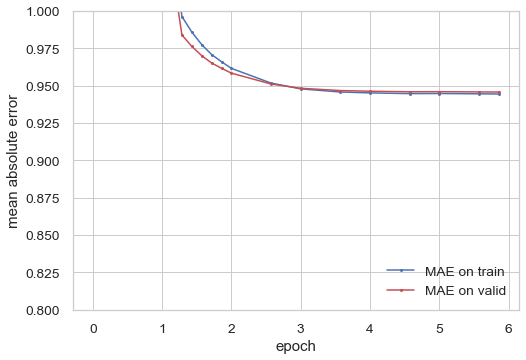

In [77]:
plt.plot(model.trace_epoch, model.trace_mae_train, 'b.-', label='MAE on train')
plt.plot(model.trace_epoch, model.trace_mae_valid, 'r.-', label='MAE on valid')

plt.xlabel('epoch');
plt.ylabel('mean absolute error');
plt.legend(loc='lower right');
plt.ylim([0.8, 1])

In [67]:
# Create the model
model2 = CollabFilterMeanOnly(
    n_epochs=6, batch_size=100, step_size=0.1)

In [68]:
model2.init_parameter_dict(n_users, n_items, train_tuple)

In [69]:
model2.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.41000 | train_MAE     3.53059 | valid_MAE     3.50620 | grad_wrt_mu     7.02000
epoch       0.001 | loss_total     9.65436 | train_MAE     2.82859 | valid_MAE     2.80420 | grad_wrt_mu     5.81600
epoch       0.003 | loss_total     6.51272 | train_MAE     2.28179 | valid_MAE     2.25771 | grad_wrt_mu     4.57280
epoch       0.004 | loss_total     4.21487 | train_MAE     1.88062 | valid_MAE     1.85704 | grad_wrt_mu     3.55824
epoch       0.126 | loss_total     1.22742 | train_MAE     0.95181 | valid_MAE     0.95115 | grad_wrt_mu     0.51310
epoch       0.250 | loss_total     1.14284 | train_MAE     0.93184 | valid_MAE     0.93644 | grad_wrt_mu     0.37114
epoch       0.376 | loss_total     1.27709 | train_MAE     0.94347 | valid_MAE     0.94501 | grad_wrt_mu     0.21898
epoch       0.500 | loss_total     1.54991 | train_MAE     0.94859 | valid_MAE     0.94878 | grad_wrt_mu     0.00558
epoch       0.626 | loss_total     0.87029 | train_MAE     0.946

In [70]:
model2.param_dict

{'mu': array([3.44925516])}

In [71]:
np.mean(np.abs(model2.predict(userids_va_N, itemids_va_N, model2.param_dict['mu'])-ratings_va_N))

0.95230018331094

In [72]:
np.mean(np.abs(model2.predict(userids_te_N, itemids_te_N, model2.param_dict['mu'])-ratings_te_N))

0.9544123151326016

(0.8, 1.0)

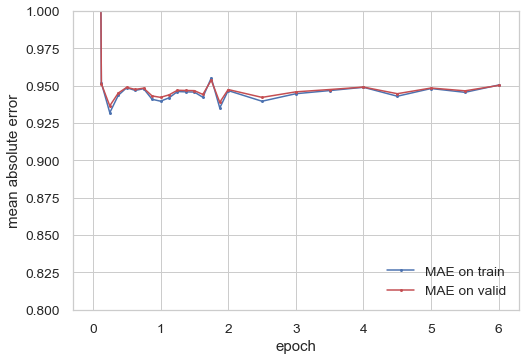

In [76]:
plt.plot(model2.trace_epoch, model2.trace_mae_train, 'b.-', label='MAE on train')
plt.plot(model2.trace_epoch, model2.trace_mae_valid, 'r.-', label='MAE on valid')

plt.xlabel('epoch');
plt.ylabel('mean absolute error');
plt.legend(loc='lower right');
plt.ylim([0.8, 1])

# Problem 2

In [7]:
import CollabFilterOneScalarPerItem
import importlib
importlib.reload(CollabFilterOneScalarPerItem)
from CollabFilterOneScalarPerItem import CollabFilterOneScalarPerItem

In [8]:
# Create the model
prob2model = CollabFilterOneScalarPerItem(
    n_epochs=8, batch_size=10000, step_size=0.1)

In [9]:
prob2model.init_parameter_dict(n_users, n_items, train_tuple)

In [10]:
prob2model.param_dict['mu']

array([0.])

In [11]:
prob2model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.63800 | train_MAE     3.53059 | valid_MAE     3.50620 | grad_wrt_mu     7.03040 | grad_wrt_b_per_user     0.00746 | grad_wrt_c_per_item     0.00418
epoch       0.143 | loss_total     9.31544 | train_MAE     2.82493 | valid_MAE     2.80057 | grad_wrt_mu     5.67669 | grad_wrt_b_per_user     0.00602 | grad_wrt_c_per_item     0.00337
epoch       0.286 | loss_total     6.38398 | train_MAE     2.28881 | valid_MAE     2.26477 | grad_wrt_mu     4.52272 | grad_wrt_b_per_user     0.00480 | grad_wrt_c_per_item     0.00269
epoch       0.429 | loss_total     4.47692 | train_MAE     1.89048 | valid_MAE     1.86695 | grad_wrt_mu     3.56305 | grad_wrt_b_per_user     0.00379 | grad_wrt_c_per_item     0.00213
epoch       0.571 | loss_total     3.32746 | train_MAE     1.59617 | valid_MAE     1.57374 | grad_wrt_mu     2.87334 | grad_wrt_b_per_user     0.00307 | grad_wrt_c_per_item     0.00174
epoch       0.714 | loss_total     2.58673 | train_MAE     1.40839 | valid_

In [12]:
prob2model.param_dict

{'mu': array([3.51670054]),
 'b_per_user': array([ 1.41177542e-02,  2.70129097e-03, -2.76233115e-03,  3.05557183e-03,
        -4.74114559e-03,  9.34459634e-03,  3.63699019e-02,  5.31531966e-03,
         2.22246524e-03,  2.00352602e-02,  3.42686491e-03,  6.06848104e-03,
        -1.22187140e-02,  1.04352457e-02, -3.60904451e-03,  1.88134232e-02,
        -2.24864659e-04,  2.03071075e-02,  6.29656630e-04, -6.89854195e-04,
        -1.12586705e-02,  9.47164620e-04,  7.92221953e-03,  8.91109431e-03,
         6.01564880e-03, -3.37844682e-03, -1.31873026e-04,  4.74781585e-03,
         1.55276905e-03,  2.68881537e-03,  3.18773006e-03,  1.95412961e-04,
         1.82439718e-03,  1.74761639e-03, -2.98192104e-04,  5.98406417e-04,
         2.56970879e-03,  6.29144320e-03,  1.01590024e-03, -9.19965505e-04,
         2.92189800e-03,  1.10233979e-02,  1.17048827e-02,  7.26949155e-03,
         2.11061766e-03,  2.50876790e-03,  1.34529482e-03,  4.55381329e-03,
        -1.22650001e-02,  6.41818259e-04,  1.2

In [13]:
np.mean(np.abs(prob2model.predict(userids_va_N, itemids_va_N, prob2model.param_dict['mu'])-ratings_va_N))

0.9387679410196197

In [14]:
np.mean(np.abs(prob2model.predict(userids_te_N, itemids_te_N, prob2model.param_dict['mu'])-ratings_te_N))

0.9378530683455802

(0.7, 1.0)

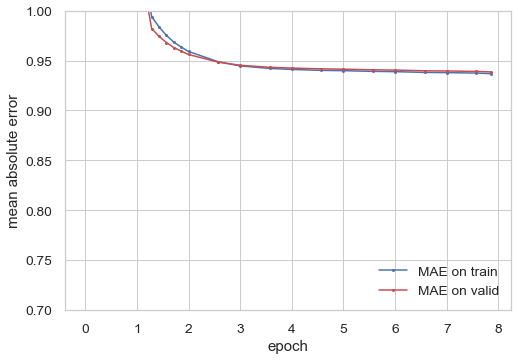

In [15]:
plt.plot(prob2model.trace_epoch, prob2model.trace_mae_train, 'b.-', label='MAE on train')
plt.plot(prob2model.trace_epoch, prob2model.trace_mae_valid, 'r.-', label='MAE on valid')

plt.xlabel('epoch');
plt.ylabel('mean absolute error');
plt.legend(loc='lower right');
plt.ylim([0.7, 1])

In [24]:
# Create the model
prob2model2 = CollabFilterOneScalarPerItem(
    n_epochs=8, batch_size=100, step_size=0.1)

In [25]:
prob2model2.init_parameter_dict(n_users, n_items, train_tuple)

In [26]:
prob2model2.param_dict['mu']

array([0.])

In [27]:
prob2model2.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.41000 | train_MAE     3.53059 | valid_MAE     3.50620 | grad_wrt_mu     7.02000 | grad_wrt_b_per_user     0.00744 | grad_wrt_c_per_item     0.00417
epoch       0.001 | loss_total     9.63843 | train_MAE     2.82615 | valid_MAE     2.80176 | grad_wrt_mu     5.81060 | grad_wrt_b_per_user     0.00616 | grad_wrt_c_per_item     0.00345
epoch       0.003 | loss_total     6.49626 | train_MAE     2.27805 | valid_MAE     2.25401 | grad_wrt_mu     4.56607 | grad_wrt_b_per_user     0.00493 | grad_wrt_c_per_item     0.00276
epoch       0.004 | loss_total     4.19962 | train_MAE     1.87608 | valid_MAE     1.85257 | grad_wrt_mu     3.54967 | grad_wrt_b_per_user     0.00386 | grad_wrt_c_per_item     0.00218
epoch       0.126 | loss_total     1.19280 | train_MAE     0.94047 | valid_MAE     0.94047 | grad_wrt_mu     0.50725 | grad_wrt_b_per_user     0.00192 | grad_wrt_c_per_item     0.00108
epoch       0.250 | loss_total     1.06353 | train_MAE     0.91026 | valid_

In [28]:
prob2model2.param_dict

{'mu': array([3.40769631]),
 'b_per_user': array([ 1.38976063e-01,  2.24767643e-02, -2.72911781e-01,  1.86895765e-01,
        -4.58490031e-01, -1.03530904e-01,  4.30063142e-01,  2.15580659e-01,
         1.13135027e-01,  4.24767124e-01, -1.18654253e-01,  2.62448013e-01,
        -4.18188104e-01,  2.88573482e-01, -3.83338445e-01,  5.72154144e-01,
        -8.97468216e-02,  2.37275881e-01, -1.83034319e-02, -2.36340482e-01,
        -6.05239349e-01, -1.51736724e-01, -8.69000857e-03,  3.89785390e-01,
         1.75109887e-01, -3.83493180e-01, -9.75711479e-02,  7.30659149e-02,
         3.83793986e-02,  9.84306018e-02,  1.04197459e-01, -1.02393722e-01,
         9.88003023e-02,  1.28014570e-01, -7.07070034e-02,  2.51023180e-02,
         3.36964218e-02,  1.59320571e-01,  2.24011076e-02, -1.86275935e-01,
        -6.45770612e-03,  1.87147516e-01,  1.64041502e-01,  3.73323560e-02,
         5.22338675e-02,  1.26012483e-01,  5.80912690e-02,  1.05863879e-01,
        -7.20772103e-01,  3.21586034e-03, -1.0

In [29]:
np.mean(np.abs(prob2model2.predict(userids_va_N, itemids_va_N, prob2model2.param_dict['mu'])-ratings_va_N))

0.772408035904613

In [30]:
np.mean(np.abs(prob2model2.predict(userids_te_N, itemids_te_N, prob2model2.param_dict['mu'])-ratings_te_N))

0.7761034498702787

(0.7, 1.0)

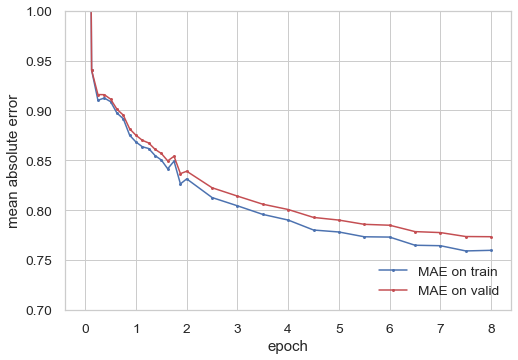

In [31]:
plt.plot(prob2model2.trace_epoch, prob2model2.trace_mae_train, 'b.-', label='MAE on train')
plt.plot(prob2model2.trace_epoch, prob2model2.trace_mae_valid, 'r.-', label='MAE on valid')

plt.xlabel('epoch');
plt.ylabel('mean absolute error');
plt.legend(loc='lower right');
plt.ylim([0.7, 1])

# Problem 3

In [7]:
import CollabFilterOneVectorPerItem
import importlib
importlib.reload(CollabFilterOneVectorPerItem)
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

In [8]:
# Create the model
prob3model = CollabFilterOneVectorPerItem(
    n_epochs=300, batch_size=1000, step_size=0.8, alpha=0, n_factors=2)

In [9]:
prob3model.init_parameter_dict(n_users, n_items, train_tuple)

In [10]:
prob3model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.56000 | train_MAE     1.00261 | valid_MAE     0.98860 | grad_wrt_mu  0.95200011 | grad_wrt_b_per_user  0.00167126 | grad_wrt_c_per_item  0.00103924 | grad_wrt_U  0.00000149 | grad_wrt_V  0.00000075
epoch       0.014 | loss_total     1.26458 | train_MAE     0.91760 | valid_MAE     0.92570 | grad_wrt_mu  0.43104327 | grad_wrt_b_per_user  0.00142541 | grad_wrt_c_per_item  0.00080195 | grad_wrt_U  0.00000130 | grad_wrt_V  0.00000062
epoch       0.029 | loss_total     1.30052 | train_MAE     0.95458 | valid_MAE     0.95272 | grad_wrt_mu  0.40388534 | grad_wrt_b_per_user  0.00147514 | grad_wrt_c_per_item  0.00091803 | grad_wrt_U  0.00000127 | grad_wrt_V  0.00000065
epoch       0.043 | loss_total     1.32458 | train_MAE     0.91793 | valid_MAE     0.92553 | grad_wrt_mu  0.42837668 | grad_wrt_b_per_user  0.00141573 | grad_wrt_c_per_item  0.00084946 | grad_wrt_U  0.00000124 | grad_wrt_V  0.00000062
epoch       0.129 | loss_total     1.22992 | train_MAE     0

epoch      13.000 | loss_total     0.89322 | train_MAE     0.74553 | valid_MAE     0.76297 | grad_wrt_mu  0.09980453 | grad_wrt_b_per_user  0.00106309 | grad_wrt_c_per_item  0.00065254 | grad_wrt_U  0.00000103 | grad_wrt_V  0.00000051
epoch      14.000 | loss_total     0.88993 | train_MAE     0.74393 | valid_MAE     0.76121 | grad_wrt_mu  0.18601373 | grad_wrt_b_per_user  0.00105627 | grad_wrt_c_per_item  0.00063847 | grad_wrt_U  0.00000099 | grad_wrt_V  0.00000053
epoch      15.000 | loss_total     0.88528 | train_MAE     0.74827 | valid_MAE     0.76331 | grad_wrt_mu  0.09877384 | grad_wrt_b_per_user  0.00109594 | grad_wrt_c_per_item  0.00063999 | grad_wrt_U  0.00000104 | grad_wrt_V  0.00000057
epoch      16.000 | loss_total     0.88160 | train_MAE     0.73988 | valid_MAE     0.75880 | grad_wrt_mu  0.17406149 | grad_wrt_b_per_user  0.00106054 | grad_wrt_c_per_item  0.00060954 | grad_wrt_U  0.00000101 | grad_wrt_V  0.00000055
epoch      17.000 | loss_total     0.87892 | train_MAE     0

epoch      64.000 | loss_total     0.83989 | train_MAE     0.72853 | valid_MAE     0.74657 | grad_wrt_mu  0.11040313 | grad_wrt_b_per_user  0.00107065 | grad_wrt_c_per_item  0.00062467 | grad_wrt_U  0.00000108 | grad_wrt_V  0.00000057
epoch      66.000 | loss_total     0.84234 | train_MAE     0.72008 | valid_MAE     0.74213 | grad_wrt_mu  0.32999813 | grad_wrt_b_per_user  0.00107398 | grad_wrt_c_per_item  0.00061270 | grad_wrt_U  0.00000109 | grad_wrt_V  0.00000057
epoch      68.000 | loss_total     0.84024 | train_MAE     0.72088 | valid_MAE     0.74110 | grad_wrt_mu  0.12195846 | grad_wrt_b_per_user  0.00101553 | grad_wrt_c_per_item  0.00060261 | grad_wrt_U  0.00000102 | grad_wrt_V  0.00000053
epoch      70.000 | loss_total     0.83810 | train_MAE     0.72792 | valid_MAE     0.74617 | grad_wrt_mu  0.08726040 | grad_wrt_b_per_user  0.00098642 | grad_wrt_c_per_item  0.00062008 | grad_wrt_U  0.00000095 | grad_wrt_V  0.00000051
epoch      72.000 | loss_total     0.83979 | train_MAE     0

epoch     140.000 | loss_total     0.83212 | train_MAE     0.71681 | valid_MAE     0.73987 | grad_wrt_mu  0.03084063 | grad_wrt_b_per_user  0.00105268 | grad_wrt_c_per_item  0.00060173 | grad_wrt_U  0.00000102 | grad_wrt_V  0.00000058
epoch     144.000 | loss_total     0.83398 | train_MAE     0.72950 | valid_MAE     0.74834 | grad_wrt_mu  0.30853295 | grad_wrt_b_per_user  0.00101179 | grad_wrt_c_per_item  0.00061639 | grad_wrt_U  0.00000103 | grad_wrt_V  0.00000056
epoch     148.000 | loss_total     0.83347 | train_MAE     0.72171 | valid_MAE     0.74230 | grad_wrt_mu  0.00866683 | grad_wrt_b_per_user  0.00108649 | grad_wrt_c_per_item  0.00060251 | grad_wrt_U  0.00000106 | grad_wrt_V  0.00000059
epoch     152.000 | loss_total     0.83305 | train_MAE     0.72607 | valid_MAE     0.74556 | grad_wrt_mu  0.19890446 | grad_wrt_b_per_user  0.00107228 | grad_wrt_c_per_item  0.00065533 | grad_wrt_U  0.00000106 | grad_wrt_V  0.00000055
epoch     156.000 | loss_total     0.83250 | train_MAE     0

epoch     280.000 | loss_total     0.83147 | train_MAE     0.71745 | valid_MAE     0.73991 | grad_wrt_mu  0.00668122 | grad_wrt_b_per_user  0.00108784 | grad_wrt_c_per_item  0.00063783 | grad_wrt_U  0.00000109 | grad_wrt_V  0.00000056
epoch     284.000 | loss_total     0.83120 | train_MAE     0.72042 | valid_MAE     0.74201 | grad_wrt_mu  0.07315012 | grad_wrt_b_per_user  0.00101551 | grad_wrt_c_per_item  0.00062065 | grad_wrt_U  0.00000100 | grad_wrt_V  0.00000052
epoch     288.000 | loss_total     0.83069 | train_MAE     0.71580 | valid_MAE     0.73900 | grad_wrt_mu  0.07465967 | grad_wrt_b_per_user  0.00096371 | grad_wrt_c_per_item  0.00060752 | grad_wrt_U  0.00000090 | grad_wrt_V  0.00000050
epoch     292.000 | loss_total     0.83363 | train_MAE     0.72203 | valid_MAE     0.74332 | grad_wrt_mu  0.04967715 | grad_wrt_b_per_user  0.00107931 | grad_wrt_c_per_item  0.00060003 | grad_wrt_U  0.00000107 | grad_wrt_V  0.00000054
epoch     296.000 | loss_total     0.82945 | train_MAE     0

In [11]:
np.mean(np.abs(prob3model.predict(userids_va_N, itemids_va_N, prob3model.param_dict['mu'])-ratings_va_N))

0.7429139699042269

In [12]:
np.mean(np.abs(prob3model.predict(userids_te_N, itemids_te_N, prob3model.param_dict['mu'])-ratings_te_N))

0.7539168142595756

(0.7, 1.0)

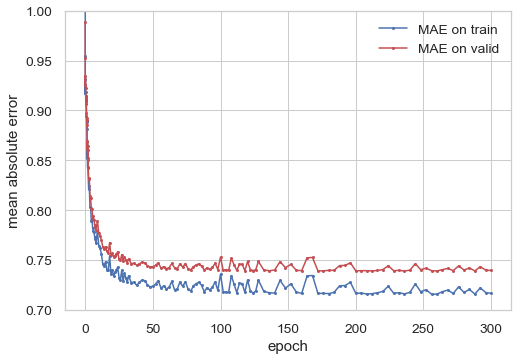

In [13]:
plt.plot(prob3model.trace_epoch, prob3model.trace_mae_train, 'b.-', label='MAE on train')
plt.plot(prob3model.trace_epoch, prob3model.trace_mae_valid, 'r.-', label='MAE on valid')

plt.xlabel('epoch');
plt.ylabel('mean absolute error');
plt.legend(loc='upper right');
plt.ylim([0.7, 1])

In [14]:
# Create the model
prob3model3 = CollabFilterOneVectorPerItem(
    n_epochs=100, batch_size=1000, step_size=0.8, alpha=0, n_factors=5)
prob3model3.init_parameter_dict(n_users, n_items, train_tuple)
prob3model3.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.52400 | train_MAE     1.00261 | valid_MAE     0.98860 | grad_wrt_mu  1.00000027 | grad_wrt_b_per_user  0.00165430 | grad_wrt_c_per_item  0.00101546 | grad_wrt_U  0.00000133 | grad_wrt_V  0.00000075
epoch       0.014 | loss_total     1.34814 | train_MAE     0.91362 | valid_MAE     0.92287 | grad_wrt_mu  0.50229482 | grad_wrt_b_per_user  0.00151589 | grad_wrt_c_per_item  0.00082955 | grad_wrt_U  0.00000121 | grad_wrt_V  0.00000068
epoch       0.029 | loss_total     1.24152 | train_MAE     0.95685 | valid_MAE     0.95454 | grad_wrt_mu  0.24363819 | grad_wrt_b_per_user  0.00147561 | grad_wrt_c_per_item  0.00087104 | grad_wrt_U  0.00000121 | grad_wrt_V  0.00000066
epoch       0.043 | loss_total     1.36014 | train_MAE     0.93431 | valid_MAE     0.93779 | grad_wrt_mu  0.19949408 | grad_wrt_b_per_user  0.00156631 | grad_wrt_c_per_item  0.00090873 | grad_wrt_U  0.00000122 | grad_wrt_V  0.00000071
epoch       0.129 | loss_total     1.22210 | train_MAE     0

epoch      13.000 | loss_total     0.89140 | train_MAE     0.74791 | valid_MAE     0.76385 | grad_wrt_mu  0.00500656 | grad_wrt_b_per_user  0.00106977 | grad_wrt_c_per_item  0.00063247 | grad_wrt_U  0.00000097 | grad_wrt_V  0.00000054
epoch      14.000 | loss_total     0.88830 | train_MAE     0.74581 | valid_MAE     0.76201 | grad_wrt_mu  0.06901243 | grad_wrt_b_per_user  0.00105764 | grad_wrt_c_per_item  0.00064572 | grad_wrt_U  0.00000096 | grad_wrt_V  0.00000055
epoch      15.000 | loss_total     0.88676 | train_MAE     0.74391 | valid_MAE     0.76038 | grad_wrt_mu  0.07403603 | grad_wrt_b_per_user  0.00109467 | grad_wrt_c_per_item  0.00067493 | grad_wrt_U  0.00000097 | grad_wrt_V  0.00000054
epoch      16.000 | loss_total     0.88196 | train_MAE     0.74731 | valid_MAE     0.76234 | grad_wrt_mu  0.10021280 | grad_wrt_b_per_user  0.00100229 | grad_wrt_c_per_item  0.00065529 | grad_wrt_U  0.00000092 | grad_wrt_V  0.00000051
epoch      17.000 | loss_total     0.88184 | train_MAE     0

epoch      64.000 | loss_total     0.84035 | train_MAE     0.73010 | valid_MAE     0.74784 | grad_wrt_mu  0.19288400 | grad_wrt_b_per_user  0.00102726 | grad_wrt_c_per_item  0.00064083 | grad_wrt_U  0.00000094 | grad_wrt_V  0.00000054
epoch      66.000 | loss_total     0.84011 | train_MAE     0.72195 | valid_MAE     0.74175 | grad_wrt_mu  0.02620746 | grad_wrt_b_per_user  0.00100613 | grad_wrt_c_per_item  0.00062383 | grad_wrt_U  0.00000091 | grad_wrt_V  0.00000053
epoch      68.000 | loss_total     0.84052 | train_MAE     0.72366 | valid_MAE     0.74291 | grad_wrt_mu  0.08837834 | grad_wrt_b_per_user  0.00103965 | grad_wrt_c_per_item  0.00063779 | grad_wrt_U  0.00000095 | grad_wrt_V  0.00000053
epoch      70.000 | loss_total     0.83821 | train_MAE     0.72687 | valid_MAE     0.74535 | grad_wrt_mu  0.00422022 | grad_wrt_b_per_user  0.00100088 | grad_wrt_c_per_item  0.00059424 | grad_wrt_U  0.00000092 | grad_wrt_V  0.00000053
epoch      72.000 | loss_total     0.84244 | train_MAE     0

In [15]:
np.mean(np.abs(prob3model3.predict(userids_va_N, itemids_va_N, prob3model3.param_dict['mu'])-ratings_va_N))

0.7409489538290825

In [16]:
np.mean(np.abs(prob3model3.predict(userids_te_N, itemids_te_N, prob3model3.param_dict['mu'])-ratings_te_N))

0.7503688306443815

(0.7, 1.0)

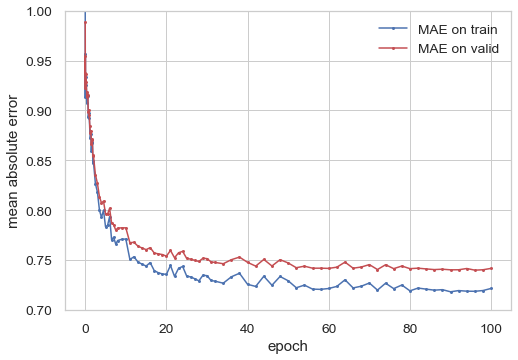

In [17]:
plt.plot(prob3model3.trace_epoch, prob3model3.trace_mae_train, 'b.-', label='MAE on train')
plt.plot(prob3model3.trace_epoch, prob3model3.trace_mae_valid, 'r.-', label='MAE on valid')

plt.xlabel('epoch');
plt.ylabel('mean absolute error');
plt.legend(loc='upper right');
plt.ylim([0.7, 1])

In [18]:
# Create the model
prob3model2 = CollabFilterOneVectorPerItem(
    n_epochs=100, batch_size=1000, step_size=0.8, alpha=0, n_factors=50)
prob3model2.init_parameter_dict(n_users, n_items, train_tuple)
prob3model2.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.50100 | train_MAE     1.00262 | valid_MAE     0.98860 | grad_wrt_mu  0.93400007 | grad_wrt_b_per_user  0.00163945 | grad_wrt_c_per_item  0.00095482 | grad_wrt_U  0.00000130 | grad_wrt_V  0.00000073
epoch       0.014 | loss_total     1.28031 | train_MAE     0.91935 | valid_MAE     0.92705 | grad_wrt_mu  0.47271382 | grad_wrt_b_per_user  0.00144830 | grad_wrt_c_per_item  0.00083319 | grad_wrt_U  0.00000114 | grad_wrt_V  0.00000064
epoch       0.029 | loss_total     1.23289 | train_MAE     0.95987 | valid_MAE     0.95668 | grad_wrt_mu  0.27719207 | grad_wrt_b_per_user  0.00144395 | grad_wrt_c_per_item  0.00087171 | grad_wrt_U  0.00000115 | grad_wrt_V  0.00000064
epoch       0.043 | loss_total     1.28778 | train_MAE     0.93445 | valid_MAE     0.93775 | grad_wrt_mu  0.00619978 | grad_wrt_b_per_user  0.00141861 | grad_wrt_c_per_item  0.00085977 | grad_wrt_U  0.00000113 | grad_wrt_V  0.00000063
epoch       0.129 | loss_total     1.12475 | train_MAE     0

epoch      12.000 | loss_total     0.89787 | train_MAE     0.75495 | valid_MAE     0.76888 | grad_wrt_mu  0.05826632 | grad_wrt_b_per_user  0.00113743 | grad_wrt_c_per_item  0.00066011 | grad_wrt_U  0.00000101 | grad_wrt_V  0.00000056
epoch      13.000 | loss_total     0.89252 | train_MAE     0.74867 | valid_MAE     0.76422 | grad_wrt_mu  0.09829704 | grad_wrt_b_per_user  0.00111660 | grad_wrt_c_per_item  0.00064385 | grad_wrt_U  0.00000100 | grad_wrt_V  0.00000056
epoch      14.000 | loss_total     0.89079 | train_MAE     0.74747 | valid_MAE     0.76301 | grad_wrt_mu  0.00224660 | grad_wrt_b_per_user  0.00104189 | grad_wrt_c_per_item  0.00063666 | grad_wrt_U  0.00000091 | grad_wrt_V  0.00000051
epoch      15.000 | loss_total     0.88682 | train_MAE     0.74152 | valid_MAE     0.76003 | grad_wrt_mu  0.23861917 | grad_wrt_b_per_user  0.00109587 | grad_wrt_c_per_item  0.00060695 | grad_wrt_U  0.00000097 | grad_wrt_V  0.00000055
epoch      16.000 | loss_total     0.88197 | train_MAE     0

epoch      62.000 | loss_total     0.83987 | train_MAE     0.72894 | valid_MAE     0.74685 | grad_wrt_mu  0.12267797 | grad_wrt_b_per_user  0.00100175 | grad_wrt_c_per_item  0.00059661 | grad_wrt_U  0.00000092 | grad_wrt_V  0.00000051
epoch      64.000 | loss_total     0.84077 | train_MAE     0.72486 | valid_MAE     0.74382 | grad_wrt_mu  0.07568926 | grad_wrt_b_per_user  0.00100286 | grad_wrt_c_per_item  0.00057056 | grad_wrt_U  0.00000092 | grad_wrt_V  0.00000051
epoch      66.000 | loss_total     0.83844 | train_MAE     0.72393 | valid_MAE     0.74316 | grad_wrt_mu  0.04348231 | grad_wrt_b_per_user  0.00102830 | grad_wrt_c_per_item  0.00059978 | grad_wrt_U  0.00000094 | grad_wrt_V  0.00000052
epoch      68.000 | loss_total     0.83956 | train_MAE     0.72006 | valid_MAE     0.74071 | grad_wrt_mu  0.13705468 | grad_wrt_b_per_user  0.00102686 | grad_wrt_c_per_item  0.00059662 | grad_wrt_U  0.00000095 | grad_wrt_V  0.00000053
epoch      70.000 | loss_total     0.84125 | train_MAE     0

In [19]:
np.mean(np.abs(prob3model2.predict(userids_va_N, itemids_va_N, prob3model2.param_dict['mu'])-ratings_va_N))

0.7421970374495827

In [20]:
np.mean(np.abs(prob3model2.predict(userids_te_N, itemids_te_N, prob3model2.param_dict['mu'])-ratings_te_N))

0.7522765511662383

(0.7, 1.0)

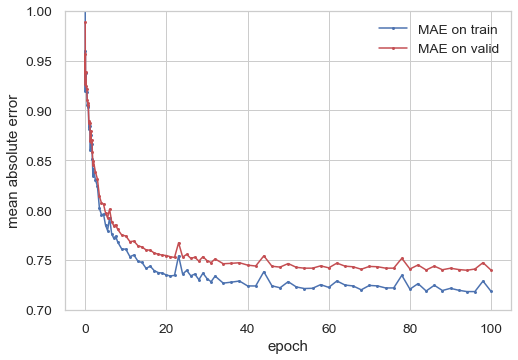

In [21]:
plt.plot(prob3model2.trace_epoch, prob3model2.trace_mae_train, 'b.-', label='MAE on train')
plt.plot(prob3model2.trace_epoch, prob3model2.trace_mae_valid, 'r.-', label='MAE on valid')

plt.xlabel('epoch');
plt.ylabel('mean absolute error');
plt.legend(loc='upper right');
plt.ylim([0.7, 1])

## with alpha

In [22]:
# Create the model
prob3part2model = CollabFilterOneVectorPerItem(
    n_epochs=100, batch_size=1000, step_size=0.8, alpha=1, n_factors=2)
prob3part2model.init_parameter_dict(n_users, n_items, train_tuple)
prob3part2model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.56001 | train_MAE     1.00261 | valid_MAE     0.98860 | grad_wrt_mu  0.95200011 | grad_wrt_b_per_user  0.00167126 | grad_wrt_c_per_item  0.00103924 | grad_wrt_U  0.00000263 | grad_wrt_V  0.00000212
epoch       0.014 | loss_total     1.26458 | train_MAE     0.91760 | valid_MAE     0.92570 | grad_wrt_mu  0.43104327 | grad_wrt_b_per_user  0.00142541 | grad_wrt_c_per_item  0.00080195 | grad_wrt_U  0.00000246 | grad_wrt_V  0.00000198
epoch       0.029 | loss_total     1.30052 | train_MAE     0.95458 | valid_MAE     0.95272 | grad_wrt_mu  0.40388534 | grad_wrt_b_per_user  0.00147514 | grad_wrt_c_per_item  0.00091803 | grad_wrt_U  0.00000240 | grad_wrt_V  0.00000200
epoch       0.043 | loss_total     1.32458 | train_MAE     0.91793 | valid_MAE     0.92553 | grad_wrt_mu  0.42837669 | grad_wrt_b_per_user  0.00141573 | grad_wrt_c_per_item  0.00084946 | grad_wrt_U  0.00000240 | grad_wrt_V  0.00000199
epoch       0.129 | loss_total     1.22992 | train_MAE     0

epoch      12.000 | loss_total     0.89728 | train_MAE     0.75581 | valid_MAE     0.76957 | grad_wrt_mu  0.05883439 | grad_wrt_b_per_user  0.00103033 | grad_wrt_c_per_item  0.00065056 | grad_wrt_U  0.00000057 | grad_wrt_V  0.00000050
epoch      13.000 | loss_total     0.89322 | train_MAE     0.74553 | valid_MAE     0.76297 | grad_wrt_mu  0.09980471 | grad_wrt_b_per_user  0.00106309 | grad_wrt_c_per_item  0.00065254 | grad_wrt_U  0.00000052 | grad_wrt_V  0.00000044
epoch      14.000 | loss_total     0.88993 | train_MAE     0.74393 | valid_MAE     0.76121 | grad_wrt_mu  0.18601367 | grad_wrt_b_per_user  0.00105627 | grad_wrt_c_per_item  0.00063847 | grad_wrt_U  0.00000047 | grad_wrt_V  0.00000040
epoch      15.000 | loss_total     0.88528 | train_MAE     0.74827 | valid_MAE     0.76331 | grad_wrt_mu  0.09877390 | grad_wrt_b_per_user  0.00109594 | grad_wrt_c_per_item  0.00063999 | grad_wrt_U  0.00000042 | grad_wrt_V  0.00000037
epoch      16.000 | loss_total     0.88160 | train_MAE     0

epoch      62.000 | loss_total     0.83961 | train_MAE     0.72266 | valid_MAE     0.74223 | grad_wrt_mu  0.04074021 | grad_wrt_b_per_user  0.00106945 | grad_wrt_c_per_item  0.00063458 | grad_wrt_U  0.00000000 | grad_wrt_V  0.00000000
epoch      64.000 | loss_total     0.83989 | train_MAE     0.72853 | valid_MAE     0.74657 | grad_wrt_mu  0.11040318 | grad_wrt_b_per_user  0.00107065 | grad_wrt_c_per_item  0.00062467 | grad_wrt_U  0.00000000 | grad_wrt_V  0.00000000
epoch      66.000 | loss_total     0.84234 | train_MAE     0.72008 | valid_MAE     0.74213 | grad_wrt_mu  0.32999807 | grad_wrt_b_per_user  0.00107398 | grad_wrt_c_per_item  0.00061270 | grad_wrt_U  0.00000000 | grad_wrt_V  0.00000000
epoch      68.000 | loss_total     0.84024 | train_MAE     0.72088 | valid_MAE     0.74110 | grad_wrt_mu  0.12195840 | grad_wrt_b_per_user  0.00101553 | grad_wrt_c_per_item  0.00060261 | grad_wrt_U  0.00000000 | grad_wrt_V  0.00000000
epoch      70.000 | loss_total     0.83810 | train_MAE     0

In [23]:
np.mean(np.abs(prob3part2model.predict(userids_va_N, itemids_va_N, prob3part2model.param_dict['mu'])-ratings_va_N))

0.752843927834575

In [24]:
np.mean(np.abs(prob3part2model.predict(userids_te_N, itemids_te_N, prob3part2model.param_dict['mu'])-ratings_te_N))

0.7672053782103835

In [25]:
print(prob3part2model.alpha)

1.0


(0.7, 1.0)

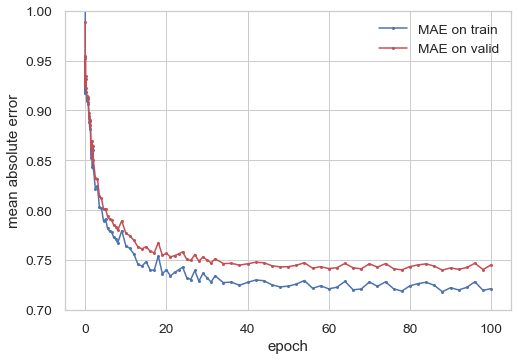

In [26]:
plt.plot(prob3part2model.trace_epoch, prob3part2model.trace_mae_train, 'b.-', label='MAE on train')
plt.plot(prob3part2model.trace_epoch, prob3part2model.trace_mae_valid, 'r.-', label='MAE on valid')

plt.xlabel('epoch');
plt.ylabel('mean absolute error');
plt.legend(loc='upper right');
plt.ylim([0.7, 1])

In [27]:
# Create the model
prob3part2model2 = CollabFilterOneVectorPerItem(
    n_epochs=100, batch_size=1000, step_size=0.8, alpha=5, n_factors=5)
prob3part2model2.init_parameter_dict(n_users, n_items, train_tuple)
prob3part2model2.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.52407 | train_MAE     1.00261 | valid_MAE     0.98860 | grad_wrt_mu  1.00000027 | grad_wrt_b_per_user  0.00165430 | grad_wrt_c_per_item  0.00101546 | grad_wrt_U  0.00000852 | grad_wrt_V  0.00000819
epoch       0.014 | loss_total     1.34820 | train_MAE     0.91362 | valid_MAE     0.92287 | grad_wrt_mu  0.50229482 | grad_wrt_b_per_user  0.00151589 | grad_wrt_c_per_item  0.00082955 | grad_wrt_U  0.00000840 | grad_wrt_V  0.00000811
epoch       0.029 | loss_total     1.24158 | train_MAE     0.95685 | valid_MAE     0.95454 | grad_wrt_mu  0.24363819 | grad_wrt_b_per_user  0.00147561 | grad_wrt_c_per_item  0.00087104 | grad_wrt_U  0.00000832 | grad_wrt_V  0.00000802
epoch       0.043 | loss_total     1.36020 | train_MAE     0.93431 | valid_MAE     0.93779 | grad_wrt_mu  0.19949408 | grad_wrt_b_per_user  0.00156631 | grad_wrt_c_per_item  0.00090873 | grad_wrt_U  0.00000822 | grad_wrt_V  0.00000797
epoch       0.129 | loss_total     1.22216 | train_MAE     0

epoch      13.000 | loss_total     0.89140 | train_MAE     0.74791 | valid_MAE     0.76385 | grad_wrt_mu  0.00500681 | grad_wrt_b_per_user  0.00106977 | grad_wrt_c_per_item  0.00063247 | grad_wrt_U  0.00000001 | grad_wrt_V  0.00000001
epoch      14.000 | loss_total     0.88830 | train_MAE     0.74581 | valid_MAE     0.76201 | grad_wrt_mu  0.06901240 | grad_wrt_b_per_user  0.00105764 | grad_wrt_c_per_item  0.00064572 | grad_wrt_U  0.00000000 | grad_wrt_V  0.00000000
epoch      15.000 | loss_total     0.88676 | train_MAE     0.74391 | valid_MAE     0.76038 | grad_wrt_mu  0.07403621 | grad_wrt_b_per_user  0.00109467 | grad_wrt_c_per_item  0.00067493 | grad_wrt_U  0.00000000 | grad_wrt_V  0.00000000
epoch      16.000 | loss_total     0.88196 | train_MAE     0.74731 | valid_MAE     0.76234 | grad_wrt_mu  0.10021252 | grad_wrt_b_per_user  0.00100229 | grad_wrt_c_per_item  0.00065529 | grad_wrt_U  0.00000000 | grad_wrt_V  0.00000000
epoch      17.000 | loss_total     0.88184 | train_MAE     0

epoch      64.000 | loss_total     0.84035 | train_MAE     0.73010 | valid_MAE     0.74784 | grad_wrt_mu  0.19288379 | grad_wrt_b_per_user  0.00102726 | grad_wrt_c_per_item  0.00064083 | grad_wrt_U  0.00000000 | grad_wrt_V  0.00000000
epoch      66.000 | loss_total     0.84011 | train_MAE     0.72195 | valid_MAE     0.74175 | grad_wrt_mu  0.02620750 | grad_wrt_b_per_user  0.00100613 | grad_wrt_c_per_item  0.00062383 | grad_wrt_U  0.00000000 | grad_wrt_V  0.00000000
epoch      68.000 | loss_total     0.84052 | train_MAE     0.72366 | valid_MAE     0.74291 | grad_wrt_mu  0.08837843 | grad_wrt_b_per_user  0.00103965 | grad_wrt_c_per_item  0.00063779 | grad_wrt_U  0.00000000 | grad_wrt_V  0.00000000
epoch      70.000 | loss_total     0.83821 | train_MAE     0.72687 | valid_MAE     0.74535 | grad_wrt_mu  0.00422019 | grad_wrt_b_per_user  0.00100088 | grad_wrt_c_per_item  0.00059424 | grad_wrt_U  0.00000000 | grad_wrt_V  0.00000000
epoch      72.000 | loss_total     0.84244 | train_MAE     0

In [28]:
print(np.mean(np.abs(prob3part2model2.predict(userids_va_N, itemids_va_N, prob3part2model2.param_dict['mu'])-ratings_va_N)))
print(np.mean(np.abs(prob3part2model2.predict(userids_te_N, itemids_te_N, prob3part2model2.param_dict['mu'])-ratings_te_N)))

0.7409489573285202
0.750368832414529


(0.7, 1.0)

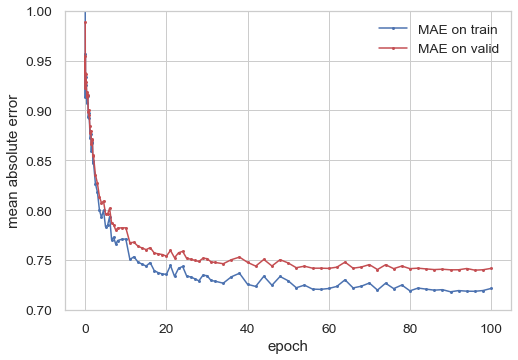

In [29]:
plt.plot(prob3part2model2.trace_epoch, prob3part2model2.trace_mae_train, 'b.-', label='MAE on train')
plt.plot(prob3part2model2.trace_epoch, prob3part2model2.trace_mae_valid, 'r.-', label='MAE on valid')

plt.xlabel('epoch');
plt.ylabel('mean absolute error');
plt.legend(loc='upper right');
plt.ylim([0.7, 1])